<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/Unsupervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Methods

![SupervisedLearning](https://github.com/MathMachado/Python_RFB/blob/DS_Python/Material/Supervised_X_Unsupervised.jpeg?raw=true)

Source: [Supervised vs Unsupervised Learning](https://www.linkedin.com/posts/asif-bhat_machinelearningalgorithms-machinelearing-activity-6576071130854055936-2mIn/)

## Leitura Complementar
https://scikit-learn.org/stable/

# Introdução aos Algoritmos de Aprendizagem não-supervisionada
* Unsupervised Learning são um tipo de Machine Learning que trabalha com dataframes não-rotulados;
* Intuitivamente, os modelos desta classe tentam estabelecer relacionamento entre os dados;
* Algoritmo mais comum: clustering.

# Clustering
* Agrupa objetos similares.
* Aplicações de Clustering:
  - Rotular os dados;
  - Entender padrões escondindos nos dados;

## Exemplo

### Carrega as bibliotecas

In [0]:
!pip install bamboolib

  Created wheel for bamboolib: filename=bamboolib-0.0.0-cp36-none-any.whl size=1251 sha256=768699d350cfab05ab15bff1db2ab39c8309d0e2d9ecc9cdd330417410fe00cc
  Stored in directory: /root/.cache/pip/wheels/3a/d4/20/5f7ee98e67d8820e1a0b61d119c9a1858b874eda9ab3cc3128
Successfully built bamboolib


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Carrega os dados

In [2]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state= 20111974)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)


NameError: ignored

### Distância ou Similaridade
* Dados do mesmo grupo/cluster são similares ao passo que dados pertencentes a diferentes grupos/clusters são diferentes; 
* Precisamos medir a similaridade e diferenças entre os dados; 
* Considere as seguintes medidas:

 - Distância de Minkowiski: 
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
 
 - Distância de Manhattan (p=1), Euclidiana (p=2)
 
 - Cosseno: Adequado para dados de texto

 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d"> 

In [0]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, manhattan_distances

## Clustering como um Problema de Otimização
* Maximizar as distâncias inter-clusters;
* Minimizar as distâncias intra-clusters;

## Tipos de Clustering
* Métodos de particionamento:
  - Particionar N pontos em k partições.
  - Inicialmente, partições aleatórias são criadas e gradualmente os dados são movidos para outras partições;
  - Usa-se as distâncias entre os pontos para otimizar os clusters;
  - Exemplo: KMeans
* Métodos Hierárquicos
  - Decomposição do dataframe;
  - Approach 1: assume cada dado individual como cluster e na sequência os dados vão sendo agrupados conforme a similaridade;
  - Approach 2: Começa com 1 cluster para todos os dados e, na sequência, particiona-se em clusters menores;
* Métodos Density-based
  - Vai acrescentando dados ao cluster até que a densidade exceda um certo threashold.

## Métodos de Particionamento
### KMeans
* Função objetivo: minimizar a soma de quadrados dentro do cluster.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/kmeans2.png?raw=true">

* Os centróides são escolhidos de forma a minimizar a soma dos quadrados do cluster.

* O algoritmo k-means divide um conjunto de $N$ amostras $X$ em $K$ clusters disjuntos $C$, cada um deles descrito pela média das amostras no cluster $\mu$.

<img src="https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png" width="300px">




### Algoritmo K-Means
1. Inicializa k centroides;
2. Atribui cada dado/ponto ao centroide mais próximo, criando clusters;
3. Recalcula centroide, que é a média de todos os dados/pontos que pertencem a cada cluster;
4. Repete os passos 2 e 3 até que não se tenha dados/pontos para atribuir aos centroides;

Animação para entendermos K-Means: http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [0]:
from sklearn.datasets import make_blobs, make_moons

In [0]:
X, y = make_blobs(n_features=2, n_samples=1000, cluster_std=.5)

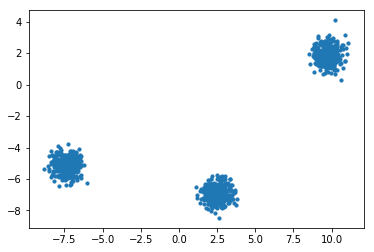

In [0]:
plt.scatter(X[:,0], X[:,1],s=10)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

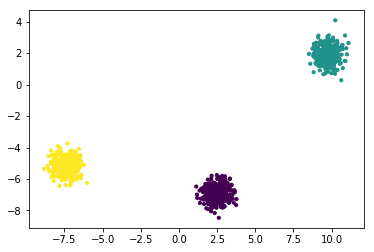

In [0]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

In [0]:
X, y = make_moons(n_samples=1000, noise=.09)

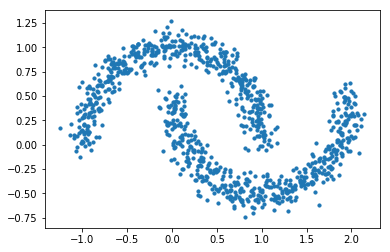

In [0]:
plt.scatter(X[:,0], X[:,1],s=10)

In [0]:
kmeans = KMeans(n_clusters= 2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

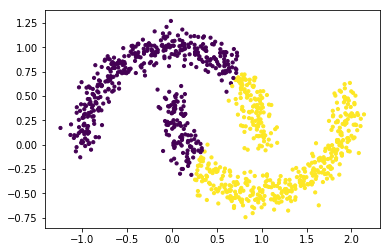

In [0]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

### Dendograma

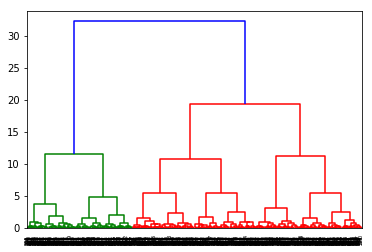

In [0]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### Limitações do K-Means
* Chance/possibilidade de um dado/ponto pertencer à múltiplos clusters;
* K-Means tenta encontrar os mínimos locais e isso depende dos valores iniciais que são gerados aleatoriamente.

### Hierarchial Clustering
* Combina múltiplos clusters similares para criar um cluster ou OU particionar um cluster para criar clusters menores de forma a agrupar dados/pontos similares;
* Tipos de hierarchaial Clustering:
  - Agglomerative Method - botton-up approach.
  - Divisive Method - top-down approach.

#### Agglomerative Method
* Inicia atribuindo um cluster para cada dado/ponto; 
* Combina clusters que possuem alta medida de similaridade;
* As diferenças entre os métodos surgem devido a diferentes maneiras de definir a distância (ou similaridade) entre os clusters. As seções a seguir descrevem várias técnicas aglomerativas em detalhes.
  - Single Linkage Clustering
  - Complete linkage clustering
  - Average linkage clustering
  - Average group linkage

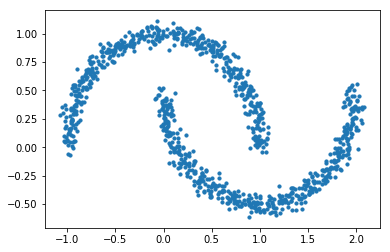

In [0]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

In [0]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(linkage='single',n_clusters=2)
agc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

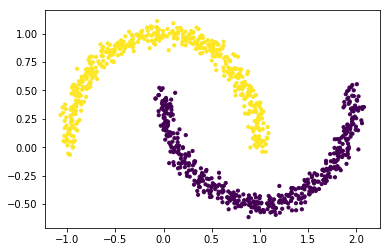

In [0]:
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

### Dendograma

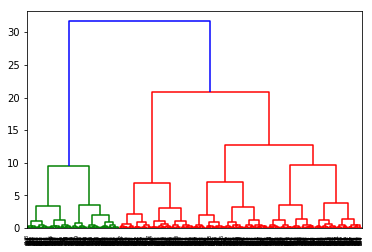

In [0]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

## Density Based Clustering - DBSCAN

In [0]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

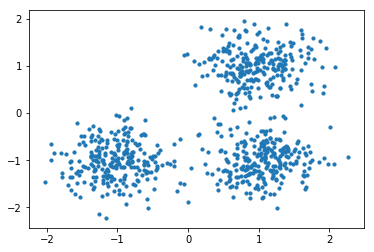

In [0]:
plt.scatter(X[:,0], X[:,1],s=10)

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

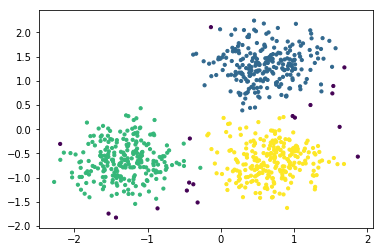

In [0]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

# Medir a Performance dos Clusters

## completeness_score
- 'Completeness' significa que todos os pontos/dados que são membros de uma determinada classe são elementos do mesmo cluster.
- Accuracy é 1.0 se o dado/ponto pertencente à mesma classe também pertence ao mesmo cluster, mesmo que múltiplas classes pertençam ao mesmo cluster.

In [0]:
from sklearn.metrics.cluster import completeness_score

In [0]:
completeness_score(labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* Acurácia= 1 porque todos os dados/pontos pertencentes à mesma classe também pertence ao mesmo cluster.

In [0]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

Porque a Acurácia = 0.3?

In [0]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


Porque a Acurácia= 1?

## Homogeneity_score
- Uma clusterização satisfaz a homogeneidade se todos os seus clusters contiverem apenas pontos/dados que são membros de uma única classe.

In [0]:
from sklearn.metrics.cluster import homogeneity_score

In [0]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [0]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [0]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Mesma classe subdividida em 2 clusters.

## silhoutte_score
* Calculado usando a distância intra-cluster média (a) e a distância média do cluster mais próximo (b) para cada amostra.
* **Decisão**: Quanto Maior --> Melhor.

### Exemplo
* Selecionar o número de clusters usando silhoutte_score no KMeans

In [0]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

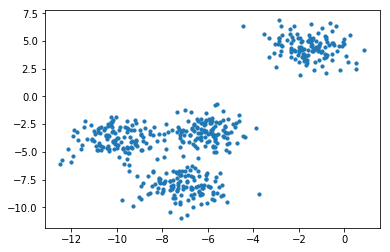

In [0]:
plt.scatter(X[:,0],X[:,1],s=10)

In [0]:
range_n_clusters = [2, 3, 4, 5, 6]

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5748109947101666
6 0.49477466202819653


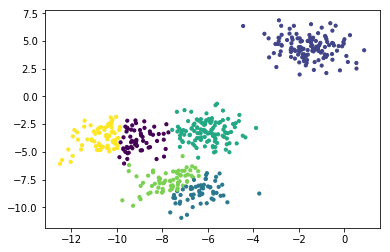

In [0]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

* O número ótimo/recomendado de cluster é 2. Porque?

## calinski_harabaz_score
* Este score é calculado como razão entre a dispersão dentro do cluster e a dispersão entre cluster.
* **Decisão**: Quanto menor --> Melhor.

In [0]:
from sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters= n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabaz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2282.058733986897
6 2026.0397195442179


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: Deprecatio

# Exercícios
* Por favor, formem grupos de até 4 pessoas e construa clusters para os dataframes abaixo:

## Exercício 1 - Breast Cancer

In [0]:
rom sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_Cancer, y_Cancer = load_breast_cancer()

## Exercício 2 - Fruits

In [0]:
url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/FruitsDataWithColor.txt?token=AGDJQ66OKOVQC63ZVXGHMJ25P3M6G'
df_Fruits = pd.read_table(url)

l_feature_names_fruits = ['height', 'width', 'mass', 'color_score']
df_X_Fruits = df_Fruits[l_feature_names_fruits]
df_y_Fruits = df_Fruits['fruit_label']
l_target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

## Exercícios 3
* Use a base de dados DIAGNOSTICOS.xlsm e k-Means para definir grupos usando os atributos do dataframe, exceto o atributo 'DIAGNOSTICO'.
    * Quantos clusters k-Means define?
    * Agora, usando o atributo 'DIAGNOSTICO', com 5 níveis (veja a aba LEGENDA da planilha), verifique se, por exemplo, as categorias -10 foram agrupadas no mesmo cluster; 